In [1]:
from IPython.display import display, HTML

In [2]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [3]:
#import from regular python

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import seaborn as sb
from ipywidgets import widgets


import os
import re
import getpass

user = getpass.getuser()

if user == "sidsel":
    cvr_Path = "/home/"+user+"/workspace/DABAI/ReadData"

elif user == "svanhmic":
    cvr_Path = "/home/"+user+"/workspace/DABAI/ReadData" # TODB alter path!



In [4]:
#imports from Pyspark

from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans

sc.addPyFile(cvr_Path+"/ConvertAllToVecToMl.py")
from ConvertAllToVecToMl import ConvertAllToVecToMl

In [5]:
data_Pdf = sb.load_dataset("flights") # naive data set from seaborn
#data_Pdf

In [6]:
#create spark data frame
flightDf = sqlContext.createDataFrame(data_Pdf)
#flightDf.show()
# Convering month to long

import datetime as dt
func = F.udf(lambda x: dt.datetime.strptime(x, '%b').month)

flightInfoDf = flightDf.select('*').withColumn('month', func(F.substring(str='month',pos=0,len=3)))

flightInfoDf= (flightInfoDf
               .withColumn("timestamp",F.concat(F.col("year"),F.lit("-"),F.col("month"),F.lit("-1 12:00:0")))
               .withColumn("datetime",F.from_utc_timestamp("timestamp","UTC"))
               .withColumn("timestamp",F.unix_timestamp(F.col("timestamp"),"yyyy-MM-dd HH:mm:ss"))
               
               #.select('newdate', 'passengers')
              )


In [7]:
#create the spark ml pipeline
myCol = ["timestamp", "passengers"]
vectorAssembler = VectorAssembler(inputCols=myCol,outputCol="features")
convertion = ConvertAllToVecToMl(inputCol=vectorAssembler.getOutputCol(), outputCol=vectorAssembler.getOutputCol())
clusters = KMeans(featuresCol=vectorAssembler.getOutputCol(), k=4, maxIter=10, initMode="random")

pipeline = Pipeline(stages=[vectorAssembler, convertion, clusters])


In [8]:
#execute the pipeline

model = pipeline.fit(flightInfoDf)
prediction = model.transform(flightInfoDf)

In [9]:
prediction.toPandas()

,year,month,passengers,timestamp,datetime,features,prediction
0,1949,1,112,-662648400,1949-01-01 12:00:00,"[-662648400.0, 112.0]",2
1,1949,2,118,-659970000,1949-02-01 12:00:00,"[-659970000.0, 118.0]",2
2,1949,3,132,-657550800,1949-03-01 12:00:00,"[-657550800.0, 132.0]",2
3,1949,4,129,-654872400,1949-04-01 12:00:00,"[-654872400.0, 129.0]",2
4,1949,5,121,-652280400,1949-05-01 12:00:00,"[-652280400.0, 121.0]",2
5,1949,6,135,-649602000,1949-06-01 12:00:00,"[-649602000.0, 135.0]",2
6,1949,7,148,-647010000,1949-07-01 12:00:00,"[-647010000.0, 148.0]",2
7,1949,8,148,-644331600,1949-08-01 12:00:00,"[-644331600.0, 148.0]",2
8,1949,9,136,-641653200,1949-09-01 12:00:00,"[-641653200.0, 136.0]",2
9,1949,10,119,-639061200,1949-10-01 12:00:00,"[-639061200.0, 119.0]",2


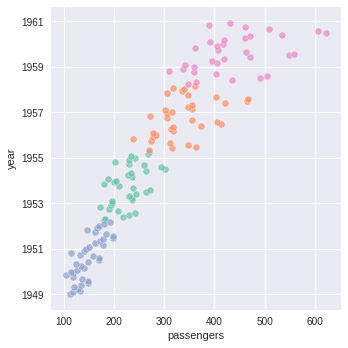

In [10]:
#return the data to Pandas for visualisation
button = widgets.Button(description="Visualize data")
display(button)

def on_button_clicked(b):
    g = sb.FacetGrid(prediction.toPandas(), hue="prediction", size=5, palette="Set2")
    xfmt = md.DateFormatter('%Y')
    g.ax.yaxis.set_major_formatter(xfmt)
    g.map(plt.scatter, "passengers", "datetime", s=50, alpha=.7, linewidth=.5, edgecolor="white")
    plt.ylabel('year')
    plt.show()

button.on_click(on_button_clicked)